In [2]:
import bagpy
from bagpy import bagreader
import pandas as pd
import rosbag
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Arrow

jfr_e2e_brokend_0	       real_e2e_traj.png
jfr_e2e_brokend_0.bag	       real_tc_traj.png
jfr_e2e_brokend_reverse_0.bag  real_track.png
jfr_tc_brokend_0	       real_traj.png
jfr_tc_brokend_0.bag	       rosbag_plotter.ipynb
jfr_tc_brokend_reverse_0.bag   sim


In [3]:
tc_bag_name = 'jfr_tc_brokend_0.bag'
tc_traj_clr = [0.565, 0.69, 0.58, 0.3]
e2e_bag_name = 'jfr_e2e_brokend_0.bag'
e2e_traj_clr = [0.353, 0.391, 0.663, 0.3]

In [4]:
tc_bag = rosbag.Bag(tc_bag_name)
tc_b = bagreader(tc_bag_name)
tc_b.topic_table

e2e_bag = rosbag.Bag(e2e_bag_name)
e2e_b = bagreader(e2e_bag_name)
e2e_b.topic_table

[INFO]  Successfully created the data folder jfr_tc_brokend_reverse_0.
[INFO]  Successfully created the data folder jfr_e2e_brokend_reverse_0.


,Topics,Types,Message Count,Frequency
0,/car_state/odom,nav_msgs/Odometry,14172,95325.090909
1,/car_state/pitch,std_msgs/Float32,14172,80.016483
2,/car_state/pose,geometry_msgs/PoseStamped,14172,80.048552
3,/constraint_list,visualization_msgs/MarkerArray,354,1.999983
4,/dev/null,std_msgs/Int8,2216,19.962420
5,/diagnostics,diagnostic_msgs/DiagnosticArray,528,3.177233
6,/dyn_sector_server/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
7,/dyn_sector_server/parameter_updates,dynamic_reconfigure/Config,1,NaN
8,/ekf/odometry/filtered,nav_msgs/Odometry,8684,67.155067
9,/global_waypoints,f110_msgs/WpntArray,89,0.500028


In [5]:
tc_pose_df = pd.read_csv(tc_b.message_by_topic('/car_state/pose'))[['pose.position.x', 'pose.position.y']]
e2e_pose_df = pd.read_csv(e2e_b.message_by_topic('/car_state/pose'))[['pose.position.x', 'pose.position.y']]

In [6]:
#Read gb wpnts because bagpy messes up custom message
tc_wpnt_array = None
for topic, msg, t in tc_bag.read_messages(topics=['/global_waypoints']): 
    tc_wpnt_array = msg.wpnts
    break

tc_wpnt_xs = []
tc_wpnt_ys = []
for wpnt in tc_wpnt_array:
    tc_wpnt_xs.append(wpnt.x_m)
    tc_wpnt_ys.append(wpnt.y_m)
    
#Read gb wpnts because bagpy messes up custom message
e2e_wpnt_array = None
for topic, msg, t in e2e_bag.read_messages(topics=['/global_waypoints']): 
    e2e_wpnt_array = msg.wpnts
    break

e2e_wpnt_xs = []
e2e_wpnt_ys = []
for wpnt in e2e_wpnt_array:
    e2e_wpnt_xs.append(wpnt.x_m)
    e2e_wpnt_ys.append(wpnt.y_m)

In [7]:
#Read track bounds because bagpy messes up marker message
tc_tb_array = None
for topic, msg, t in tc_bag.read_messages(topics=['/trackbounds/markers']): 
    tc_tb_array = msg.markers
    break

tc_tb_xs = []
tc_tb_ys = []
for tb in tc_tb_array:
    tc_tb_xs.append(tb.pose.position.x)
    tc_tb_ys.append(tb.pose.position.y)

#Read track bounds because bagpy messes up marker message
e2e_tb_array = None
for topic, msg, t in e2e_bag.read_messages(topics=['/trackbounds/markers']): 
    e2e_tb_array = msg.markers
    break

e2e_tb_xs = []
e2e_tb_ys = []
for tb in e2e_tb_array:
    e2e_tb_xs.append(tb.pose.position.x)
    e2e_tb_ys.append(tb.pose.position.y)

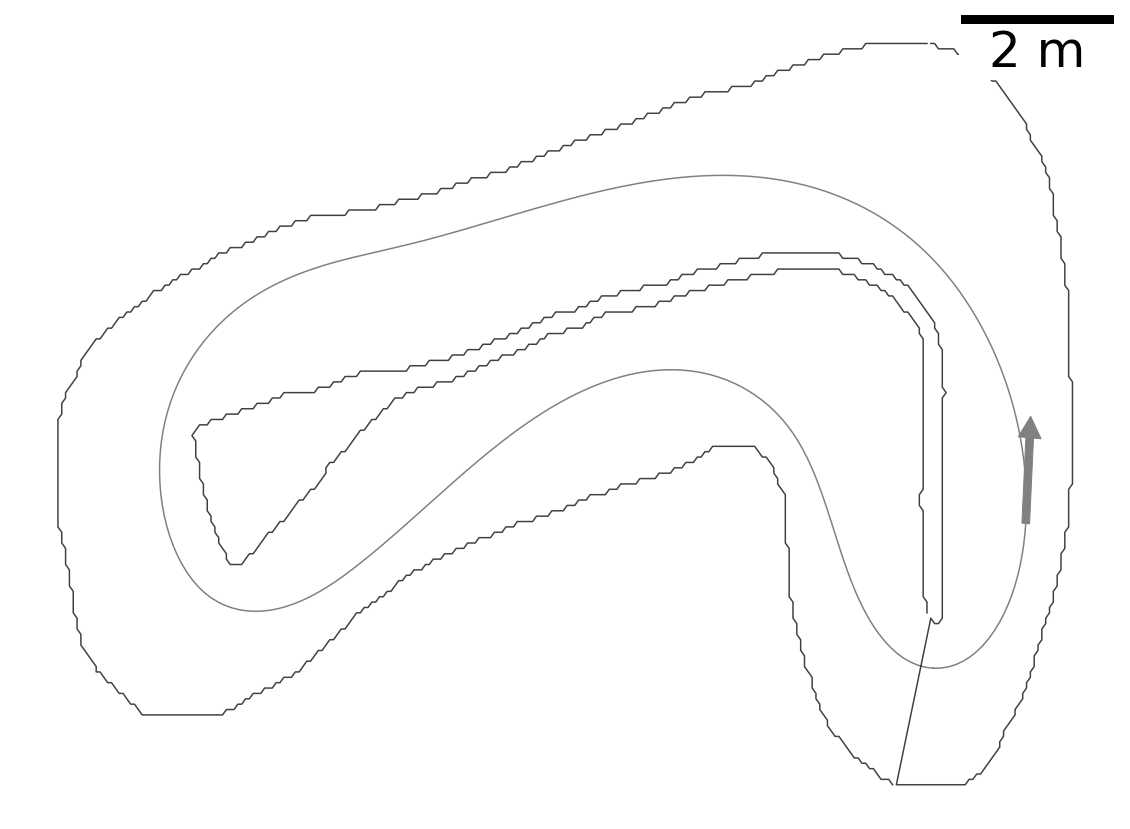

In [8]:
#Plot only SLAM MAP with raceline
fig =  plt.figure(figsize=(20,15), facecolor='white')
ax = fig.add_subplot(111)

arr_par = {'x' :  tc_wpnt_xs[20], 'dx' : 10 * (tc_wpnt_xs[21] - tc_wpnt_xs[20]), 
           'y' : tc_wpnt_ys[20], 'dy' : 10 * (tc_wpnt_ys[21] - tc_wpnt_ys[20]),
           'color': 'gray',
           'width' : 0.5}
ax.add_artist(ScaleBar(1, location='upper right', border_pad=0.7, font_properties={'size': 50}))
ax.add_artist(Arrow(**arr_par))


plt.plot(tc_wpnt_xs, tc_wpnt_ys, alpha=1, c='gray')
plt.plot(tc_tb_xs[:522], tc_tb_ys[:522], alpha=0.75, c='black')
plt.plot(tc_tb_xs[522:], tc_tb_ys[522:], alpha=0.75, c='black')
    
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.tick_params(bottom=False,   top=False, left= False, right = False, direction='in')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)  # change width
ax.axis('off')
plt.savefig('real_track.png')

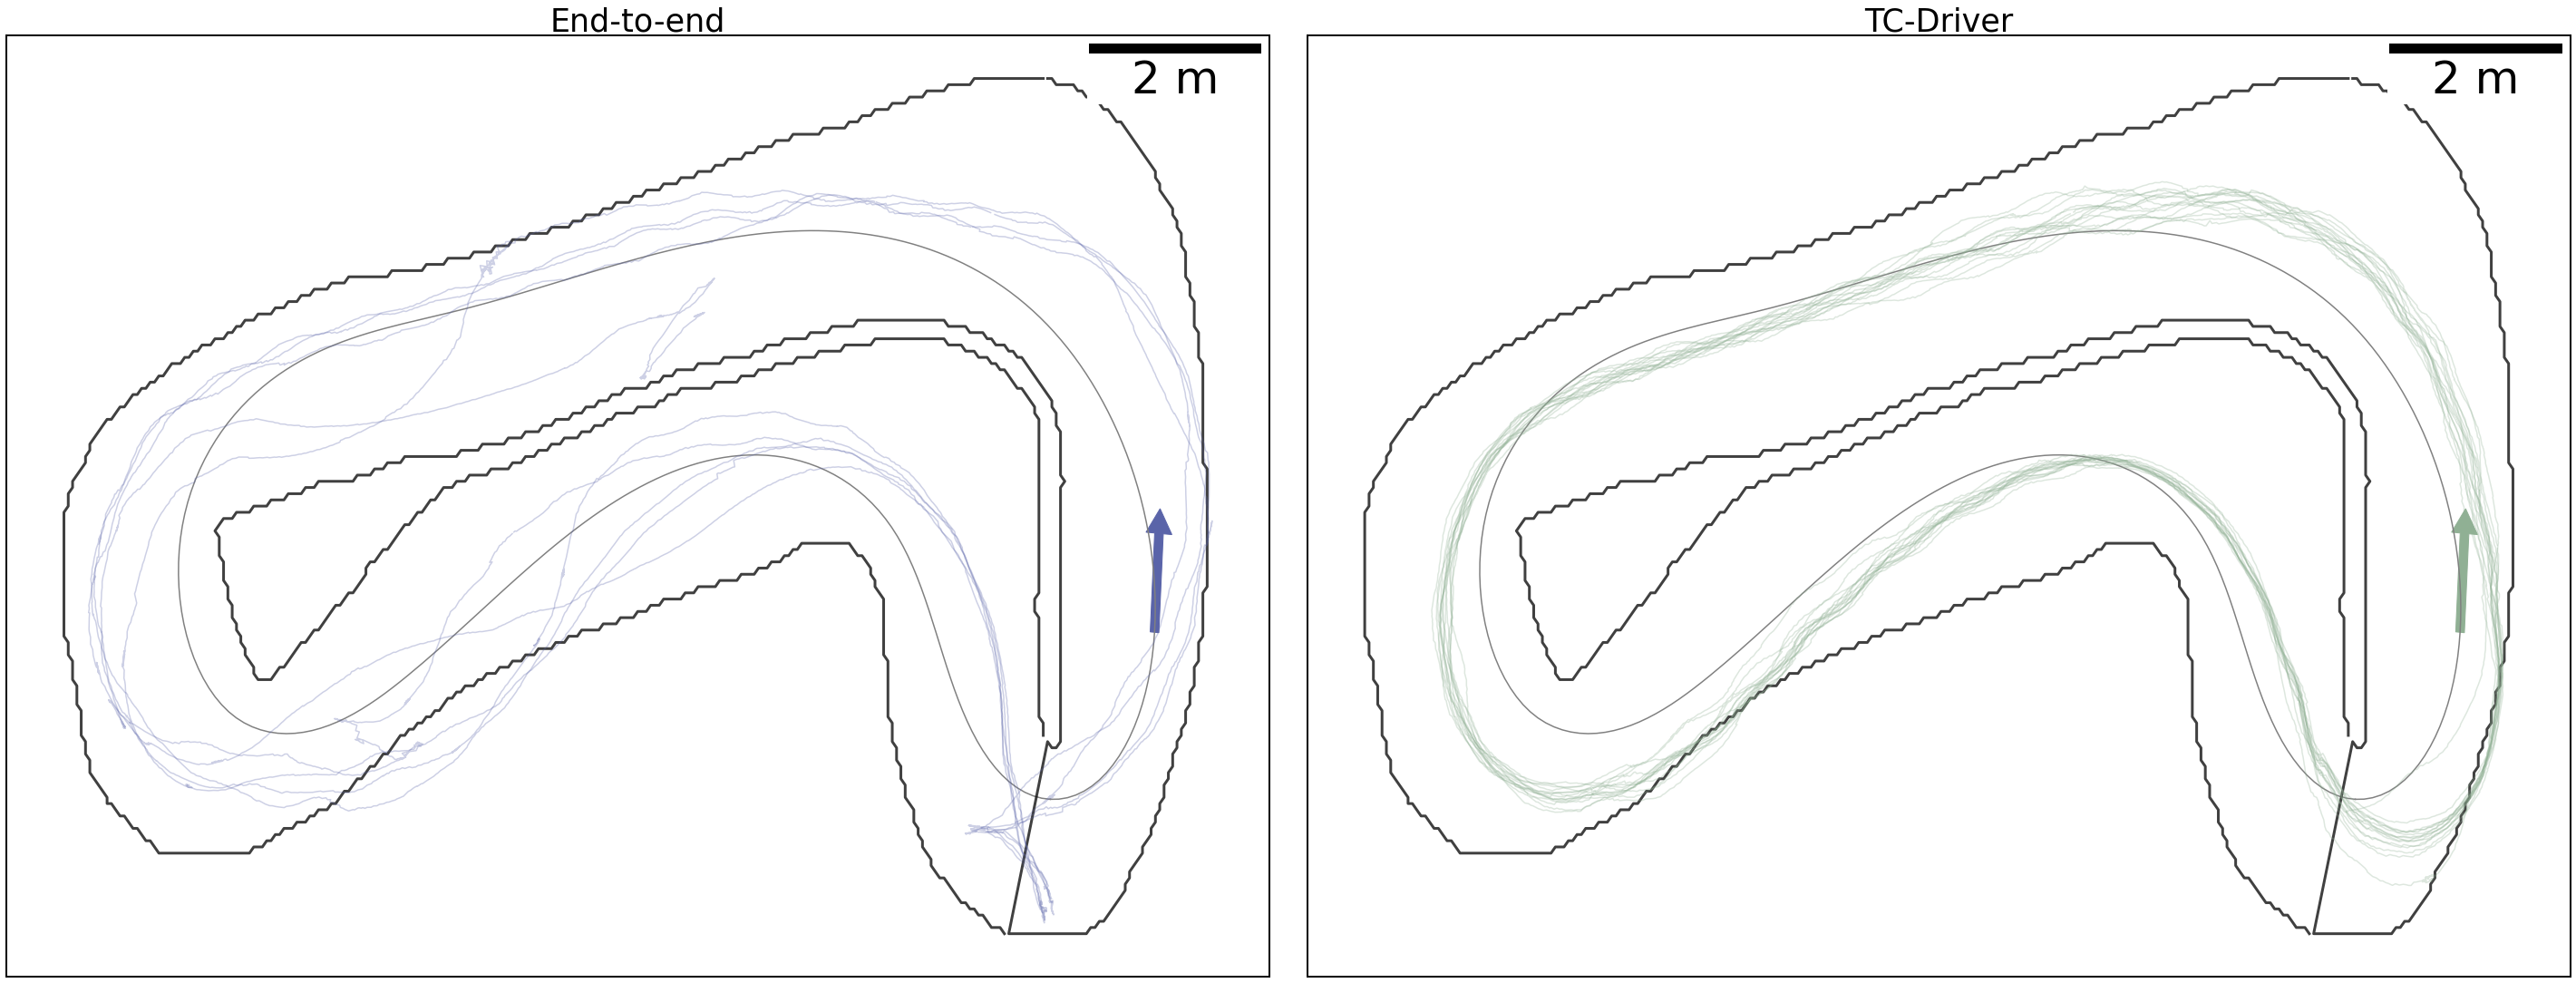

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 15), facecolor='white')
fig.tight_layout()
e2e_ax = axes[0]
tc_ax = axes[1]

arr_par = {'x' :  tc_wpnt_xs[20], 'dx' : 10 * (tc_wpnt_xs[21] - tc_wpnt_xs[20]), 
           'y' : tc_wpnt_ys[20], 'dy' : 10 * (tc_wpnt_ys[21] - tc_wpnt_ys[20]),
           'color': tc_traj_clr[:-1],
           'width' : 0.5}

tc_ax.add_artist(ScaleBar(1, location='upper right', border_pad=0.7, font_properties={'size': 50}))
tc_ax.add_artist(Arrow(**arr_par))


tc_ax.plot(tc_wpnt_xs, tc_wpnt_ys, alpha=1, c='gray')
tc_ax.plot(tc_tb_xs[:522], tc_tb_ys[:522], alpha=0.75, c='black', linewidth=3)
tc_ax.plot(tc_tb_xs[522:], tc_tb_ys[522:], alpha=0.75, c='black', linewidth=3)
for i in range(10):
    x = tc_pose_df['pose.position.x'][int(i*len(tc_pose_df)/10): int((i + 1)*len(tc_pose_df)/10)]
    y = tc_pose_df['pose.position.y'][int(i*len(tc_pose_df)/10): int((i + 1)*len(tc_pose_df)/10)]
    tc_ax.plot(x, y, alpha=tc_traj_clr[-1], c=tc_traj_clr[:-1])
    
arr_par = {'x' :  e2e_wpnt_xs[20], 'dx' : 10 * (e2e_wpnt_xs[21] - e2e_wpnt_xs[20]), 
           'y' : e2e_wpnt_ys[20], 'dy' : 10 * (e2e_wpnt_ys[21] - e2e_wpnt_ys[20]),
           'color': e2e_traj_clr[:-1],
           'width' : 0.5}

e2e_ax.add_artist(ScaleBar(1, location='upper right', border_pad=0.7, font_properties={'size': 50}))
e2e_ax.add_artist(Arrow(**arr_par))

e2e_ax.set_title('End-to-end', fontsize=35)
e2e_ax.plot(e2e_wpnt_xs, e2e_wpnt_ys, alpha=1, c='gray')
e2e_ax.plot(e2e_tb_xs[:522], e2e_tb_ys[:522], alpha=0.75, c='black', linewidth=3)
e2e_ax.plot(e2e_tb_xs[522:], e2e_tb_ys[522:], alpha=0.75, c='black', linewidth=3)
for i in range(10):
    x = e2e_pose_df['pose.position.x'][int(i*len(e2e_pose_df)/10): int((i + 1)*len(e2e_pose_df)/10)]
    y = e2e_pose_df['pose.position.y'][int(i*len(e2e_pose_df)/10): int((i + 1)*len(e2e_pose_df)/10)]
    e2e_ax.plot(x, y, alpha=e2e_traj_clr[-1], c=e2e_traj_clr[:-1])

tc_ax.set_title('TC-Driver', fontsize=35)
tc_ax.xaxis.set_ticklabels([])
tc_ax.yaxis.set_ticklabels([])
tc_ax.tick_params(bottom=False, top=False, left= False, right = False, direction='in')
e2e_ax.xaxis.set_ticklabels([])
e2e_ax.yaxis.set_ticklabels([])
e2e_ax.tick_params(bottom=False, top=False, left= False, right = False, direction='in')

for axis in ['top', 'bottom', 'left', 'right']:
    tc_ax.spines[axis].set_linewidth(2)  # change width
    e2e_ax.spines[axis].set_linewidth(2)  # change width

plt.savefig('real_traj.png', bbox_inches='tight')